len GPUcolo ddl 61
len GSLICE ddl 58
len Separate ddl 58
0.34958571454889287


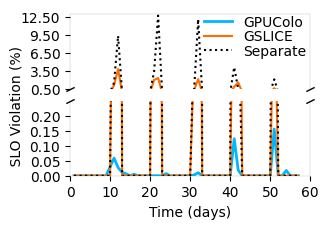

In [129]:
import os
cap=1000
# Num of gpus
path_ddl_proposed80k_1000 = "Proposed80k_%d_v2/data/miss_ddl"%(cap)
dir_ddl_proposed80k_1000 = os.listdir(path_ddl_proposed80k_1000)
print("len GPUcolo ddl %d"%(len(dir_ddl_proposed80k_1000)))

path_ddl_gslice80k_1_1000 = "Gslice80k_1_%d_v2/data/miss_ddl"%(cap)
dir_ddl_gslice80k_1_1000 = os.listdir(path_ddl_gslice80k_1_1000)
print("len GSLICE ddl %d"%(len(dir_ddl_gslice80k_1_1000)))

path_ddl_separate80k_1_1000 = "Separate80k_1_%d/data/miss_ddl"%(cap)
dir_ddl_separate80k_1_1000 = os.listdir(path_ddl_separate80k_1_1000)
print("len Separate ddl %d"%(len(dir_ddl_separate80k_1_1000)))

ddl_gslice80k_1_1000 = []
for ind in range(len(dir_ddl_gslice80k_1_1000)-1):
    with open(path_ddl_gslice80k_1_1000+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_gslice80k_1_1000.append(float(l)*100)

ddl_proposed80k_1000 = []
for ind in range(len(dir_ddl_proposed80k_1000)-1):
    with open(path_ddl_proposed80k_1000+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_proposed80k_1000.append(float(l)*100)
        
ddl_separate80k_1_1000 = []
for ind in range(len(dir_ddl_separate80k_1_1000)-1):
    with open(path_ddl_separate80k_1_1000+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_separate80k_1_1000.append(float(l)*100)

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.15)  # adjust space between axes
# fig, ax = plt.subplots()
fig.set_size_inches(3.1, 2.1)
plt.rcParams['axes.linewidth'] = 0.08
line1,=ax1.plot(np.arange(1, len(ddl_proposed80k_1000)+1-3), ddl_proposed80k_1000[:57], color='#00B6FF', linewidth=2, label='GPUColo')
line2,=ax1.plot(np.arange(1, len(ddl_gslice80k_1_1000)+1), ddl_gslice80k_1_1000, color='#FF6C00', linewidth=1.5, label='GSLICE')
line3,=ax1.plot(np.arange(1, len(ddl_separate80k_1_1000)+1), ddl_separate80k_1_1000, linestyle='dotted', color='#000000', linewidth=1.5, label='Separate')
line1,=ax2.plot(np.arange(1, len(ddl_proposed80k_1000)+1-3), ddl_proposed80k_1000[:57], color='#00B6FF', linewidth=2, label='GPUColo')
line2,=ax2.plot(np.arange(1, len(ddl_gslice80k_1_1000)+1), ddl_gslice80k_1_1000, color='#FF6C00', linewidth=1.5, label='GSLICE')
line3,=ax2.plot(np.arange(1, len(ddl_separate80k_1_1000)+1), ddl_separate80k_1_1000, linestyle='dotted', color='#000000', linewidth=1.5, label='Separate')
# line3,=ax.plot(np.arange(1, len(ddl_non[:25])+1), ddl_non[:25], color='tab:green', label='No Co-location')
# line4,=ax.plot(np.arange(1, len(ddl_separate)+1), ddl_separate, color='tab:purple', label='Separate')
# lns = [line1,line2,line3,line4]
# zoom-in / limit the view to different portions of the data
ax1.set_ylim(0.5, 13)  # outliers only
ax1.yaxis.set_ticks(np.arange(0.5, 11+3, 3))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_ylim(0, .25)  # most of the data
ax2.yaxis.set_ticks(np.arange(0, 0.2+0.05, 0.05))

lns = [line1, line2, line3]
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='center',fancybox=False, 
               shadow=False, ncol=1, frameon=False,columnspacing=0.05, labelspacing=0.05, alignment='right',
           bbox_to_anchor=(0.77, 0.7))
ax2.set_xlabel('Time (days)')
plt.ylabel("               SLO Violation (%)")
# ax2.set_ylabel('SLO Violation (%)')
# ax.set_ylim([0,11])
ax2.set_xlim([0,60])
ax2.xaxis.set_ticks(np.arange(0, 61, 10))
# plt.rcParams['axes.linewidth'] = 1.0
# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
# ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax1.tick_params(bottom=False)
ax2.xaxis.tick_bottom()

# ax2.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

print(np.mean(ddl_gslice80k_1_1000[19:39]))
# plt.tight_layout()
plt.savefig('figs/slo_gpu%d.pdf'%cap, dpi=300, bbox_inches = "tight")

In [13]:
ddl_separate80k_1_1000=np.array(ddl_separate80k_1_1000)
max_ind = ddl_separate80k_1_1000.argmax(axis=0) 
print("Separate max %d, rate %f"%(max_ind, ddl_separate80k_1_1000[max_ind]))

ddl_gslice80k_1_1000=np.array(ddl_gslice80k_1_1000)
max_ind = ddl_gslice80k_1_1000.argmax(axis=0) 
print("Gslice max %d, rate %f"%(max_ind, ddl_gslice80k_1_1000[max_ind]))

ddl_proposed80k_1000=np.array(ddl_proposed80k_1000)
max_ind = ddl_proposed80k_1000.argmax(axis=0) 
print("GPUColo max %d, rate %f"%(max_ind, ddl_proposed80k_1000[max_ind]))

Separate max 21, rate 12.743358
Gslice max 11, rate 3.849382
GPUColo max 50, rate 0.155122


In [14]:
import os
cap=1100
# Num of gpus
path_ddl_proposed80k_1100 = "Proposed80k_%d_v2/data/miss_ddl"%(cap)
dir_ddl_proposed80k_1100 = os.listdir(path_ddl_proposed80k_1100)
print("len GPUcolo ddl %d"%(len(dir_ddl_proposed80k_1100)))

path_ddl_gslice80k_1_1100 = "Gslice80k_1_%d_v2/data/miss_ddl"%(cap)
dir_ddl_gslice80k_1_1100 = os.listdir(path_ddl_gslice80k_1_1100)
print("len GSLICE ddl %d"%(len(dir_ddl_gslice80k_1_1100)))

path_ddl_separate80k_1_1100 = "Separate80k_1_%d/data/miss_ddl"%(cap)
dir_ddl_separate80k_1_1100 = os.listdir(path_ddl_separate80k_1_1100)
print("len Separate ddl %d"%(len(dir_ddl_separate80k_1_1100)))

ddl_gslice80k_1_1100 = []
for ind in range(len(dir_ddl_gslice80k_1_1100)-1):
    with open(path_ddl_gslice80k_1_1100+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_gslice80k_1_1100.append(float(l)*100)

ddl_proposed80k_1100 = []
for ind in range(len(dir_ddl_proposed80k_1100)-1):
    with open(path_ddl_proposed80k_1100+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_proposed80k_1100.append(float(l)*100)
        
ddl_separate80k_1_1100 = []
for ind in range(len(dir_ddl_separate80k_1_1100)-1):
    with open(path_ddl_separate80k_1_1100+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_separate80k_1_1100.append(float(l)*100)

len GPUcolo ddl 61
len GSLICE ddl 58
len Separate ddl 58


In [15]:
import os
cap=900
# Num of gpus
path_ddl_proposed80k_900 = "Proposed80k_%d_v2/data/miss_ddl"%(cap)
dir_ddl_proposed80k_900 = os.listdir(path_ddl_proposed80k_900)
print("len GPUcolo ddl %d"%(len(dir_ddl_proposed80k_900)))

path_ddl_gslice80k_1_900 = "Gslice80k_1_%d_v2/data/miss_ddl"%(cap)
dir_ddl_gslice80k_1_900 = os.listdir(path_ddl_gslice80k_1_900)
print("len GSLICE ddl %d"%(len(dir_ddl_gslice80k_1_900)))

path_ddl_separate80k_1_900 = "Separate80k_1_%d/data/miss_ddl"%(cap)
dir_ddl_separate80k_1_900 = os.listdir(path_ddl_separate80k_1_900)
print("len Separate ddl %d"%(len(dir_ddl_separate80k_1_900)))

ddl_gslice80k_1_900 = []
for ind in range(len(dir_ddl_gslice80k_1_900)-1):
    with open(path_ddl_gslice80k_1_900+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_gslice80k_1_900.append(float(l)*100)

ddl_proposed80k_900 = []
for ind in range(len(dir_ddl_proposed80k_900)-1):
    with open(path_ddl_proposed80k_900+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_proposed80k_900.append(float(l)*100)
        
ddl_separate80k_1_900 = []
for ind in range(len(dir_ddl_separate80k_1_900)-1):
    with open(path_ddl_separate80k_1_900+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_separate80k_1_900.append(float(l)*100)

len GPUcolo ddl 64
len GSLICE ddl 58
len Separate ddl 58


In [114]:
import os
cap=800
# Num of gpus
path_ddl_proposed80k_800 = "Proposed80k_%d_v2/data/miss_ddl"%(cap)
dir_ddl_proposed80k_800 = os.listdir(path_ddl_proposed80k_800)
print("len GPUcolo ddl %d"%(len(dir_ddl_proposed80k_800)))

path_ddl_gslice80k_1_800 = "Gslice80k_1_%d_v2/data/miss_ddl"%(cap)
dir_ddl_gslice80k_1_800 = os.listdir(path_ddl_gslice80k_1_800)
print("len GSLICE ddl %d"%(len(dir_ddl_gslice80k_1_800)))

path_ddl_separate80k_1_800 = "Separate80k_1_%d/data/miss_ddl"%(cap)
dir_ddl_separate80k_1_800 = os.listdir(path_ddl_separate80k_1_800)
print("len Separate ddl %d"%(len(dir_ddl_separate80k_1_800)))

ddl_gslice80k_1_800 = []
for ind in range(len(dir_ddl_gslice80k_1_800)-1):
    with open(path_ddl_gslice80k_1_800+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_gslice80k_1_800.append(float(l)*100)

ddl_proposed80k_800 = []
for ind in range(len(dir_ddl_proposed80k_800)-1):
    with open(path_ddl_proposed80k_800+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_proposed80k_800.append(float(l)*100)
        
ddl_separate80k_1_800 = []
for ind in range(len(dir_ddl_separate80k_1_800)-1):
    with open(path_ddl_separate80k_1_800+'/miss_ddl_slo100_day%d'%(ind+1)) as f:
        lines = f.readlines()
    for l in lines:
        ddl_separate80k_1_800.append(float(l)*100)

len GPUcolo ddl 53
len GSLICE ddl 58
len Separate ddl 58


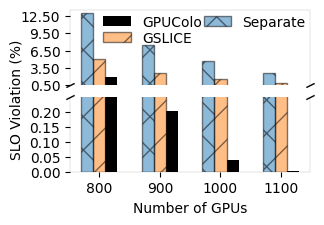

In [128]:
inds=np.array([10, 11, 20, 21, 30, 31, 40, 41, 50, 51])
m_proposed = []
m_proposed.append(np.mean(np.array(ddl_proposed80k_800)[inds]))
m_proposed.append(np.mean(np.array(ddl_proposed80k_900)[inds]))
m_proposed.append(np.mean(np.array(ddl_proposed80k_1000)[inds]))
m_proposed.append(np.mean(np.array(ddl_proposed80k_1100)[inds]))

m_gslice = []
m_gslice.append(np.mean(np.array(ddl_gslice80k_1_800)[inds]))
m_gslice.append(np.mean(np.array(ddl_gslice80k_1_900)[inds]))
m_gslice.append(np.mean(np.array(ddl_gslice80k_1_1000)[inds]))
m_gslice.append(np.mean(np.array(ddl_gslice80k_1_1100)[inds]))

m_separate = []
m_separate.append(np.mean(np.array(ddl_separate80k_1_800)[inds]))
m_separate.append(np.mean(np.array(ddl_separate80k_1_900)[inds]))
m_separate.append(np.mean(np.array(ddl_separate80k_1_1000)[inds]))
m_separate.append(np.mean(np.array(ddl_separate80k_1_1100)[inds]))

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.15)  # adjust space between axes
# fig, ax = plt.subplots()
fig.set_size_inches(3.1, 2.1)
labels = ['800','900','1000','1100']
plt.rcParams['axes.linewidth'] = 0.08
X_axis = np.arange(len(labels))
width = 0.2
line1=ax1.bar(X_axis+width, m_proposed, width=width,color='black', label = 'GPUColo')
line2=ax1.bar(X_axis, m_gslice, width=width, color='tab:orange', alpha=0.5, edgecolor='black', capsize=5, hatch='/', label = 'GSLICE')
line3=ax1.bar(X_axis-width, m_separate, width=width, color='tab:blue', alpha=0.5, edgecolor='black', capsize=5, hatch='x', label = 'Separate')
line1=ax2.bar(X_axis+width, m_proposed, width=width,color='black', label = 'GPUColo')
line2=ax2.bar(X_axis, m_gslice, width=width, color='tab:orange', alpha=0.5, edgecolor='black', capsize=5, hatch='/', label = 'GSLICE')
line3=ax2.bar(X_axis-width, m_separate, width=width, color='tab:blue', alpha=0.5, edgecolor='black', capsize=5, hatch='x', label = 'Separate')

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(0.7, 13.5)  # outliers only
ax1.yaxis.set_ticks(np.arange(0.5, 12+3, 3))
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.set_ylim(0, .25)  # most of the data
ax2.yaxis.set_ticks(np.arange(0, 0.2+0.05, 0.05))

lns = [line1,line2,line3]
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper center',fancybox=True,
           shadow=False, ncol=2, frameon=True,
           bbox_to_anchor=(0.56, 1.1), columnspacing=0.1, 
          labelspacing=0.15,facecolor='white', framealpha=0)

ax2.set_ylabel('                SLO Violation (%)')
ax2.set_xticks(X_axis, labels)
ax2.set_xlabel('Number of GPUs')
# ax.set_ylim(0,11)
# plt.tight_layout()
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
# ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax1.tick_params(bottom=False)
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=6,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.savefig('figs/slos_gpu_caps.pdf', dpi=300, bbox_inches = "tight")

In [123]:
print(np.max(m_proposed))
print(np.max(m_gslice))
print(np.max(m_separate))

1.9457250862583622
5.096226473367988
12.983056934196975


In [124]:
print(np.min(m_proposed))
print(np.min(m_gslice))
print(np.min(m_separate))

0.0021942742200919962
0.913716868881963
2.641124318357603
